# MNIST Handwritten Digit Classifier - Classify the Odd/Even Number

Given a dataset of 6,000 images of handwritten digits, train a neural network to identify whether the digit is an odd number or an even number.

In [15]:
from sklearn.model_selection import train_test_split
from keras.datasets import mnist
from keras.preprocessing.image import load_img, array_to_img
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Load and split data into training and test sets.

In [16]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [17]:
X = np.concatenate([X_train, X_test])
y = np.concatenate([y_train, y_test])

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3)
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=1/3)

In [18]:
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)
print(X_test.shape)
print(y_test.shape)

(49000, 28, 28)
(49000,)
(14000, 28, 28)
(14000,)
(7000, 28, 28)
(7000,)


Prepare features and target for training.

In [19]:
image_height,image_width = 28, 28

X_train = X_train.reshape(49000, image_height*image_width)
X_val = X_val.reshape(14000, image_height*image_width)
X_test = X_test.reshape(7000, image_height*image_width)

X_train = X_train.astype('float32')
X_val = X_val.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255.0
X_val /= 255.0
X_test /= 255.0

print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(49000, 784)
(14000, 784)
(7000, 784)


In [20]:
y_train = y_train % 2
y_val = y_val % 2
y_test = y_test % 2

print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

(49000,)
(14000,)
(7000,)


Train a neural network with 2 hidden layers of 64 nodes each.

In [21]:
model = Sequential()

In [22]:
model.add(Dense(16, activation='relu', input_shape=(784,)))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [23]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [24]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 16)                12560     
                                                                 
 dense_4 (Dense)             (None, 16)                272       
                                                                 
 dense_5 (Dense)             (None, 1)                 17        
                                                                 
Total params: 12,849
Trainable params: 12,849
Non-trainable params: 0
_________________________________________________________________


In [25]:
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val))

Epoch 1/20
1532/1532 [==============================] - 5s 3ms/step - loss: 0.1706 - accuracy: 0.9357 - val_loss: 0.1053 - val_accuracy: 0.9633
Epoch 2/20
1532/1532 [==============================] - 3s 2ms/step - loss: 0.0905 - accuracy: 0.9686 - val_loss: 0.0891 - val_accuracy: 0.9706
Epoch 3/20
1532/1532 [==============================] - 3s 2ms/step - loss: 0.0747 - accuracy: 0.9740 - val_loss: 0.0752 - val_accuracy: 0.9741
Epoch 4/20
1532/1532 [==============================] - 3s 2ms/step - loss: 0.0640 - accuracy: 0.9781 - val_loss: 0.0785 - val_accuracy: 0.9724
Epoch 5/20
1532/1532 [==============================] - 4s 2ms/step - loss: 0.0583 - accuracy: 0.9794 - val_loss: 0.0840 - val_accuracy: 0.9708
Epoch 6/20
1532/1532 [==============================] - 5s 3ms/step - loss: 0.0543 - accuracy: 0.9817 - val_loss: 0.0737 - val_accuracy: 0.9771
Epoch 7/20
1532/1532 [==============================] - 4s 3ms/step - loss: 0.0518 - accuracy: 0.9818 - val_loss: 0.0682 - val_accuracy:

Evaluate the model performance.

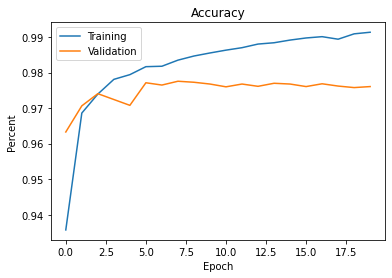

In [26]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.xlabel('Epoch')
plt.ylabel('Percent')
plt.title('Accuracy')
plt.legend(['Training', 'Validation'])

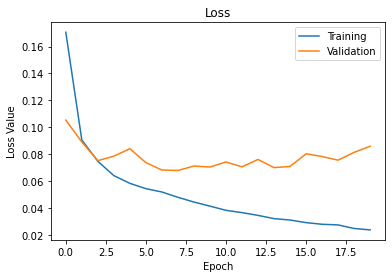

In [27]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.xlabel('Epoch')
plt.ylabel('Loss Value')
plt.title('Loss')
plt.legend(['Training', 'Validation'])

In [28]:
score = model.evaluate(X_test, y_test)
score

219/219 [==============================] - 0s 1ms/step - loss: 0.0792 - accuracy: 0.9774


[0.0792153924703598, 0.9774285554885864]